In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv',usecols=[1],
                    engine='python',
                    delimiter=',',
                    decimal=".",
                    thousands=',',
                    header=None,
                    names=['date','value'] )
data = data.values
data = data.astype('float32')
print(data)

In [ ]:
def normalize(data,scale):
    normalized = []
    for i in range(len(data)):
       a = (min(scale))+((data[i]-min(data))*
              max(scale)-min(scale))/(max(data)-min(data))
       normalized.append(a)
    return np.array(normalized)

    
scale = (-1,1)
normalized = normalize(data,scale)
print(normalized)

In [ ]:
def pisahData(normalized,a,b):
     if((a+b)!=1):
            print("pemisahan tidak valid")
     else:
        train = []
        test = []
        train_size = int(len(normalized)*a)
        train = normalized[0:train_size-1]
        test = normalized[train_size-1:len(normalized)]
     return np.array(train),np.array(test)

train_data, test_data = pisahData(normalized, 0.7, 0.3)

In [2]:
def createDataset(data, windowSize):
    dataX, dataY = [],[]
    for i in range(len(data)-windowSize):
        a = []
        for j in range(i, i+windowSize):
            a.append(data[j,0])
        dataX.append(a)
        dataY.append(data[i+windowSize,0])
    return np.array(dataX), np.array(dataY)
windowSize = 3
trainX, trainY = createDataset(train_data,windowSize)
testX, testY = createDataset(test_data, windowSize)

NameError: name 'train_data' is not defined

hyperbolic tangent

In [9]:
def tanh(x):
    return (1-np.exp(-2*x))/(1+np.exp(-2*x))

turunan hyperbolic tangent

In [10]:
def dtanh(x):
    return (1-tanh(x)**2)

inisialisasi dimensi layer

In [11]:
input_dim = windowSize
hidden_dim = 1 
output_dim = 1

inisialisasi awal bobotjaringan (be careful)

In [12]:
synapse_0 = 2*np.random.random((input_dim,hidden_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,output_dim)) - 1

inisialisasi context layer, nilai (Q,R,P) masih harus diperbaruiiii

In [ ]:
context_layer = np.full((trainX.shape[0],hidden_dim),0)
layer_h_deltas = np.zeros(hidden_dim)
Q = 1*np.identity(jumlah_w)
R = 1*np.identity(output_dim)
P = 1*np.identity(jumlah_w)

isi di words (belum) isi persamaan 3.8 dan 9 untuk penghitungan forwward pass dibawah

In [ ]:
layer_1 = tanh(np.dot(trainX,synapse_0) +
              np.dot(context_layer,synapse_h))
layer_2 = tanh(np.dot(layer_1,synapse_1))

#UKF

In [ ]:
for i=1:size(data,1)
    rata2 = mean(data)
    stdDev = sqrt(sum((data)))

In [ ]:
innovation = ((trainY-layer_2).sum()/len(trainY))
w_concat_new = w_concat + np.dot(K,innovation)

In [ ]:
layer_h_deltas = layer_1_delta
context_layer = layer_1

In [ ]:
context_layer_p = np.full((testY.shape[0],hidden_dim),0)
layer_lp = tanh(np.dot(testX,synapse_0) +
               np.dot(context_layer_p,synapse_h))
layer_2p = tanh(np.dot(layer_lp,synapse_1))

# pengujian

Denormalized

In [ ]:
def denormalize(normalized, data, scale):
    denormalized = []
    for i in range(len(normalized)):
        a= ((normalized[i]-min(scale)-min(scale))+min(data)
           denormalized.append(a)
    return np.array(denormalized)
y_pred = denormalize(layer_2p, test_data, scale)
testY = denormalize(testY, test_data, scale)

MSE

In [ ]:
def mse(x,y):
    mse = []
    for i in range(len(x)):
        a = (x[i]-y[i])**2
        mse.append(a)
    mse = float((sum(mse)/len(y)))
return mse

RMSE

In [ ]:
def rmse(x,y):
    rmse = []
    for i in range(len(x)):
        a = (x[i]-y[i])**2
        mse.append(a)
    rmse = float((sum(mse)/len(y))**0.5)
return rmse

MAE

In [ ]:
def mae(x,y):
    mae = []
    for i in range(len(x)):
        a = abs(x[i]-y[i])
        mae.append(a)
    mae = float((sum(mse))/len(y))
    return mae

MAPE

In [ ]:
def mape(x,y):
    mape = []
    for i in range(len(x)):
        a = abs((x[i]-y[i])/x[i])
        mape.append(a)
    mape = float((sum(mse))/len(y))*100
    return mape

Dstat

In [ ]:
def dstat(x,y):
    dstat = 0
    n = len(y)
    for i in range(n-1):
        if(((x[i+1]-y[i])*(y[i+1]-y[i]))>=0):
            dstat += 1
    Dstat = (1/float(n-1))*float(dstat)*100
    return float(Dstat)

# Py3 - cheat sheet

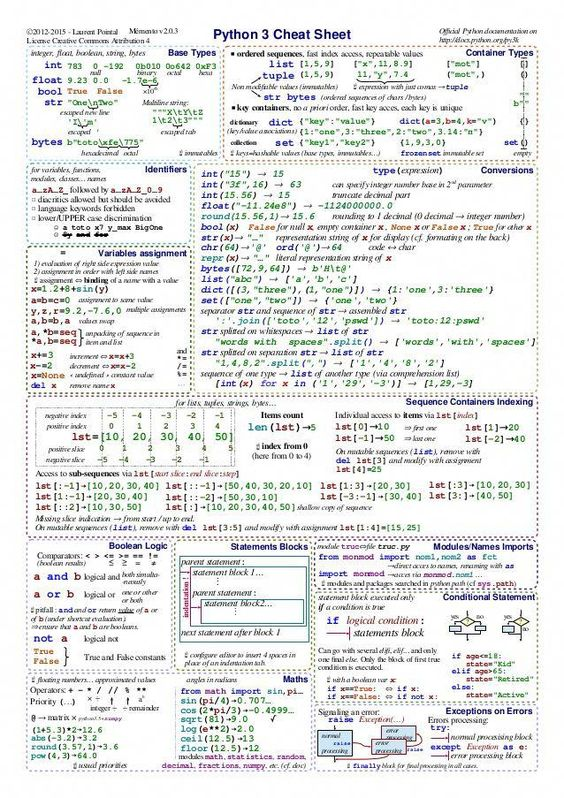

### Predict Step

The UKF's predict step computes the prior using the process model $f()$. $f()$ is assumed to be nonlinear, so we generate sigma points $\mathcal{X}$ and their corresponding weights $W^m, W^c$
according to some function:

$$\begin{aligned}
\boldsymbol\chi &= \text{sigma-function}(\mathbf x, \mathbf P) \\
W^m, W^c &= \text{weight-function}(\mathtt{n, parameters})\end{aligned}$$

We pass each sigma point through $f(\mathbf x, \Delta t)$. This projects the sigma points forward in time according to the process model, forming the new prior, which is a set of sigma points we name $\boldsymbol{\mathcal Y}$:

$$\boldsymbol{\mathcal{Y}} = f(\boldsymbol{\chi}, \Delta t)$$

We compute the mean and covariance of the prior using the *unscented transform* on the transformed sigma points.  

$$\mathbf{\bar x}, \mathbf{\bar P} = 
UT(\mathcal{Y}, w_m, w_c, \mathbf Q)$$

These are the equations for the unscented transform:

$$\begin{aligned}
\mathbf{\bar x} &= \sum_{i=0}^{2n} w^m_i\boldsymbol{\mathcal Y}_i \\
\mathbf{\bar P} &= \sum_{i=0}^{2n} w^c_i({\boldsymbol{\mathcal Y}_i - \mathbf{\bar x})(\boldsymbol{\mathcal Y}_i-\mathbf{\bar x})^\mathsf{T}} + \mathbf Q
\end{aligned}
$$

This table compares the linear Kalman filter with the Unscented Kalman Filter equations. I've dropped the subscript $i$ for readability.

$$\begin{array}{l|l}
\text{Kalman} & \text{Unscented} \\
\hline 
& \boldsymbol{\mathcal Y} = f(\boldsymbol\chi) \\
\mathbf{\bar x} = \mathbf{Fx} & 
\mathbf{\bar x} = \sum w^m\boldsymbol{\mathcal Y}  \\
\mathbf{\bar P} = \mathbf{FPF}^\mathsf T + \mathbf Q  & 
\mathbf{\bar P} = \sum w^c({\boldsymbol{\mathcal Y} - \mathbf{\bar x})(\boldsymbol{\mathcal Y} - \mathbf{\bar x})^\mathsf T}+\mathbf Q
\end{array}$$

### Update Step

Kalman filters perform the update in measurement space. Thus we must convert the sigma points of the prior into measurements using a measurement function $h(x)$ that you define.

$$\boldsymbol{\mathcal{Z}} = h(\boldsymbol{\mathcal{Y}})$$

We compute the mean and covariance of these points using the unscented transform. The $z$ subscript denotes that these are the mean and covariance of the measurement sigma points.

$$\begin{aligned}
\boldsymbol\mu_z, \mathbf P_z &= 
UT(\boldsymbol{\mathcal Z}, w_m, w_c, \mathbf R) \\
\boldsymbol\mu_z &= \sum_{i=0}^{2n} w^m_i\boldsymbol{\mathcal Z}_i \\
\mathbf P_z &= \sum_{i=0}^{2n} w^c_i{(\boldsymbol{\mathcal Z}_i-\boldsymbol{\mu}_z)(\boldsymbol{\mathcal Z}_i-\boldsymbol{\mu}_z)^\mathsf T} + \mathbf R
\end{aligned}
$$

Next we compute the residual and Kalman gain. The residual of the measurement $\mathbf z$ is trivial to compute:

$$\mathbf y = \mathbf z - \boldsymbol\mu_z$$

To compute the Kalman gain we first compute the [cross covariance](https://en.wikipedia.org/wiki/Cross-covariance) of the state and the measurements, which is defined as: 

$$\mathbf P_{xz} =\sum_{i=0}^{2n} w^c_i(\boldsymbol{\mathcal Y}_i-\mathbf{\bar x})(\boldsymbol{\mathcal Z}_i-\boldsymbol\mu_z)^\mathsf T$$

And then the Kalman gain is defined as

$$\mathbf{K} = \mathbf P_{xz} \mathbf P_z^{-1}$$

If you think of the inverse as a *kind of* matrix reciprocal, you can see that the Kalman gain is a simple ratio which computes:

$$\mathbf{K} \approx \frac{\mathbf P_{xz}}{\mathbf P_z} 
\approx \frac{\text{belief in state}}{\text{belief in measurement}}$$

Finally, we compute the new state estimate using the residual and Kalman gain:

$$\mathbf x = \bar{\mathbf x} + \mathbf{Ky}$$

and the new covariance is computed as:

$$ \mathbf P = \mathbf{\bar P} - \mathbf{KP_z}\mathbf{K}^\mathsf{T}$$

This step contains a few equations you have to take on faith, but you should be able to see how they relate to the linear Kalman filter equations. The linear algebra is slightly different from the linear Kalman filter, but the algorithm is the same Bayesian algorithm we have been implementing throughout the book. 

This table compares the equations of the linear KF and UKF equations.

$$\begin{array}{l|l}
\textrm{Kalman Filter} & \textrm{Unscented Kalman Filter} \\
\hline 
& \boldsymbol{\mathcal Y} = f(\boldsymbol\chi) \\
\mathbf{\bar x} = \mathbf{Fx} & 
\mathbf{\bar x} = \sum w^m\boldsymbol{\mathcal Y}  \\
\mathbf{\bar P} = \mathbf{FPF}^\mathsf T+\mathbf Q  & 
\mathbf{\bar P} = \sum w^c({\boldsymbol{\mathcal Y} - \mathbf{\bar x})(\boldsymbol{\mathcal Y} - \mathbf{\bar x})^\mathsf T}+\mathbf Q \\
\hline 
& \boldsymbol{\mathcal Z} =  h(\boldsymbol{\mathcal{Y}}) \\
& \boldsymbol\mu_z = \sum w^m\boldsymbol{\mathcal{Z}} \\
\mathbf y = \mathbf z - \mathbf{Hx} &
\mathbf y = \mathbf z - \boldsymbol\mu_z \\
\mathbf S = \mathbf{H\bar PH}^\mathsf{T} + \mathbf R & 
\mathbf P_z = \sum w^c{(\boldsymbol{\mathcal Z}-\boldsymbol\mu_z)(\boldsymbol{\mathcal{Z}}-\boldsymbol\mu_z)^\mathsf{T}} + \mathbf R \\ 
\mathbf K = \mathbf{\bar PH}^\mathsf T \mathbf S^{-1} &
\mathbf K = \left[\sum w^c(\boldsymbol{\mathcal Y}-\bar{\mathbf x})(\boldsymbol{\mathcal{Z}}-\boldsymbol\mu_z)^\mathsf{T}\right] \mathbf P_z^{-1} \\
\mathbf x = \mathbf{\bar x} + \mathbf{Ky} & \mathbf x = \mathbf{\bar x} + \mathbf{Ky}\\
\mathbf P = (\mathbf{I}-\mathbf{KH})\mathbf{\bar P} & \mathbf P = \bar{\mathbf P} - \mathbf{KP_z}\mathbf{K}^\mathsf{T}
\end{array}$$

### Sigma Point Computation

The first sigma point is the mean of the input. This is the sigma point displayed in the center of the ellipses in the diagram above. We will call this $\boldsymbol{\chi}_0$.

$$ \mathcal{X}_0 = \mu$$

For notational convenience we define $\lambda = \alpha^2(n+\kappa)-n$, where $n$ is the dimension of $\mathbf x$. The remaining sigma points are computed as

$$ 
\boldsymbol{\chi}_i = \begin{cases}
\mu + \left[ \sqrt{(n+\lambda)\Sigma}\right ]_{i}& \text{for i=1 .. n} \\
\mu - \left[ \sqrt{(n+\lambda)\Sigma}\right]_{i-n} &\text{for i=(n+1) .. 2n}\end{cases}
$$
The $i$ subscript chooses the i$^{th}$ column vector of the matrix.

In other words, we scale the covariance matrix by a constant, take the square root of it, and ensure symmetry by both adding and subtracting it from the mean. We will discuss how you take the square root of a matrix later.

### Weight Computation

This formulation uses one set of weights for the means, and another set for the covariance. The weights for the mean of $\mathcal{X}_0$ is computed as

$$W^m_0 = \frac{\lambda}{n+\lambda}$$

The weight for the covariance of $\mathcal{X}_0$ is

$$W^c_0 = \frac{\lambda}{n+\lambda} + 1 -\alpha^2 + \beta$$

The weights for the rest of the sigma points $\boldsymbol{\chi}_1 ... \boldsymbol{\chi}_{2n}$ are the same for the mean and covariance. They are

$$W^m_i = W^c_i = \frac{1}{2(n+\lambda)}\;\;\;i=1..2n$$

It may not be obvious why this is 'correct', and indeed, it cannot be proven that this is ideal for all nonlinear problems. But you can see that we are choosing the sigma points proportional to the square root of the covariance matrix, and the square root of variance is standard deviation. So, the sigma points are spread roughly according to $\pm 1\sigma$ times some scaling factor. There is an $n$ term in the denominator, so with more dimensions the points will be spread out and weighed less.

**Important note:** Ordinarily these weights do not sum to one. I get many questions about this. Getting weights that sum to greater than one, or even negative values is expected. I cover this in more detail below.


### Reasonable Choices for the Parameters

$\beta=2$ is a good choice for Gaussian problems, $\kappa=3-n$ where $n$ is the dimension of $\mathbf x$ is a good choice for $\kappa$, and $0 \le \alpha \le 1$ is an appropriate choice for $\alpha$, where a larger value for $\alpha$ spreads the sigma points further from the mean.

## Using the UKF

Let's solve some problems so you can gain confidence in how easy the UKF is to use. We will start with a linear problem you already know how to solve with the linear Kalman filter. Although the UKF was designed for nonlinear problems, it finds the same optimal result as the linear Kalman filter for linear problems. We will write a filter to track an object in 2D using a constant velocity model. This will allow us to focus on what is the same (and most is the same!) and what is different with the UKF. 

Designing a Kalman filter requires you to specify the $\bf{x}$, $\bf{F}$, $\bf{H}$, $\bf{R}$, and $\bf{Q}$ matrices. We have done this many times so I will give you the matrices without a lot of discussion. We want a constant velocity model, so we define $\bf{x}$ to be

$$ \mathbf x = \begin{bmatrix}x &  \dot x & y & \dot y \end{bmatrix}^\mathsf{T}$$

With this ordering of state variables the state transition matrix is

$$\mathbf F = \begin{bmatrix}1 & \Delta t & 0 & 0 \\
0&1&0&0 \\
0&0&1&\Delta t\\
0&0&0&1
\end{bmatrix}$$

which implement the Newtonian equations

$$\begin{aligned}
x_k &= x_{k-1} + \dot x_{k-1}\Delta t \\
y_k &= y_{k-1} + \dot y_{k-1}\Delta t
\end{aligned}$$

Our sensors provide position but not velocity, so the measurement function is

$$\mathbf H = \begin{bmatrix}1&0&0&0 \\ 0&0&1&0
\end{bmatrix}$$

The sensor readings are in meters with an error of $\sigma=0.3$ meters in both *x* and *y*. This gives us a measurement noise matrix of 

$$\mathbf R = \begin{bmatrix}0.3^2 &0\\0 & 0.3^2\end{bmatrix}$$

Finally, let's assume that the process noise can be represented by the discrete white noise model - that is, that over each time period the acceleration is constant. We can use `FilterPy`'s `Q_discrete_white_noise()` to create this matrix for us, but for review the matrix is

$$\mathbf Q = \begin{bmatrix}
\frac{1}{4}\Delta t^4 & \frac{1}{2}\Delta t^3 \\
\frac{1}{2}\Delta t^3 & \Delta t^2\end{bmatrix} \sigma^2$$

My implementation of this filter is:

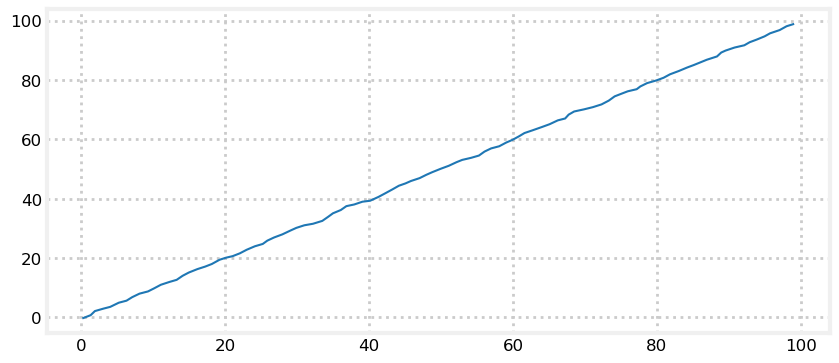

In [16]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from numpy.random import randn

std_x, std_y = .3, .3
dt = 1.0

np.random.seed(1234)
kf = KalmanFilter(4, 2)
kf.x = np.array([0., 0., 0., 0.])
kf.R = np.diag([std_x**2, std_y**2])
kf.F = np.array([[1, dt, 0, 0], 
                 [0, 1, 0, 0],
                 [0, 0, 1, dt],
                 [0, 0, 0, 1]])
kf.H = np.array([[1, 0, 0, 0],
                 [0, 0, 1, 0]])
 
kf.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=1, var=0.02)
kf.Q[2:4, 2:4] = Q_discrete_white_noise(2, dt=1, var=0.02)

zs = [np.array([i + randn()*std_x, 
                i + randn()*std_y]) for i in range(100)]               
xs, _, _, _ = kf.batch_filter(zs)
plt.plot(xs[:, 0], xs[:, 2]);

This should hold no surprises for you. Now let's implement a UKF. Again, this is purely for educational purposes; using a UKF for a linear problem confers no benefit. `FilterPy` implements the UKF with the class `UnscentedKalmanFilter`. 

The first thing to do is implement the functions `f(x, dt)` and `h(x)`. `f(x, dt)` implements the state transition function, and `h(x)` implements the measurement function. These correspond to the matrices $\mathbf F$ and $\mathbf H$ in the linear filter.

Below is a reasonable implementation of these two functions. Each is expected to return a 1D NumPy array or list containing the result. You may give them more readable names than `f` and `h`.

In [17]:
def f_cv(x, dt):
    """ state transition function for a 
    constant velocity aircraft"""
    
    F = np.array([[1, dt, 0,  0],
                  [0,  1, 0,  0],
                  [0,  0, 1, dt],
                  [0,  0, 0,  1]])
    return np.dot(F, x)

def h_cv(x):
    return x[[0, 2]]

Next you specify how to compute the sigma points and weights. We gave Van der Merwe's  version above, but there are many different choices. FilterPy uses a class named `SigmaPoints` which must implement a method:

```python
def sigma_points(self, x, P)
```

and contain attributes `Wm` and `Wc`, which hold the weights for computing the mean and covariance, respectively.

FilterPy derives the class `MerweScaledSigmaPoints` from `SigmaPoints` and implements the aforementioned methods.

When you create the UKF you will pass in the $f()$ and $h()$ functions and the sigma point  object, as in this example:

```python
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF

points = MerweScaledSigmaPoints(n=4, alpha=.1, beta=2., kappa=-1)
ukf = UKF(dim_x=4, dim_z=2, fx=f_cv, hx=h_cv, dt=dt, points=points)
```

The rest of the code is the same as for the linear kalman filter. I'll use the same measurements and compute the standard deviation of the difference between the two solutions.

from filterpy.kalman import UnscentedKalmanFilter as UKF

import numpy as np

sigmas = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=1.)
ukf = UKF(dim_x=4, dim_z=2, fx=f_cv,
          hx=h_cv, dt=dt, points=sigmas)
ukf.x = np.array([0., 0., 0., 0.])
ukf.R = np.diag([0.09, 0.09]) 
ukf.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=1, var=0.02)
ukf.Q[2:4, 2:4] = Q_discrete_white_noise(2, dt=1, var=0.02)

uxs = []
for z in zs:
    ukf.predict()
    ukf.update(z)
    uxs.append(ukf.x.copy())
uxs = np.array(uxs)

plt.plot(uxs[:, 0], uxs[:, 2])
print('UKF standard deviation {:.3f} meters'.format(np.std(uxs - xs)))

## Codes yang dibutuhkan di variabel penentuan ##

input_dimension = 14
output_dimension = 2
data_length = 1300
batch_size = 128
windowSize = 
state_size = 20
learning_rate = 0.01
epoch = 200

data = pd.read_csv('data.csv',usecols=[1],
                    engine='python',
                    delimiter=',',
                    decimal=".",
                    thousands=',',
                    header=None,
                    names=['date','value'] )
data = data.values
data = data.astype('float32')
print(data)

## codes dari paper
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)     

# [CHEAT SHEET] catat semua variabelnya #

## 1. KOVARIAN

Beda kovarian dengan korelasi:
-Kovarian: ukur kekuatan/kelemahan korelasi 2 variabel (-1,+1)
-Korelasi: versi skala kovarian (berapapun dalam float)
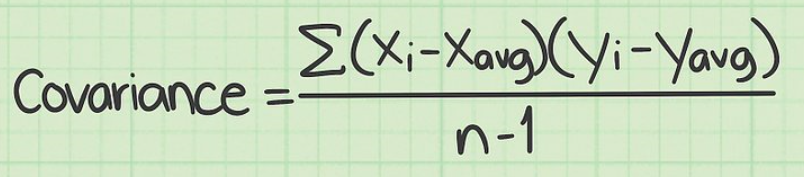

## 2. Statistika

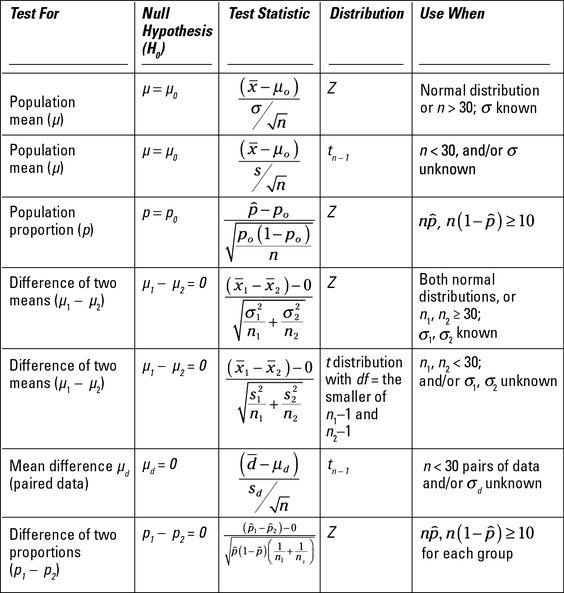
